***

<p style="font-family:Courier New; text-align:center"><b>Assigned Student: Abbassi Yassir</b></p>
<p style="font-family:Courier New; text-align:center"><b>Due date: March 31, 2022</b></p>

<br>

<p style="font-family:Courier New; text-align:center" align="center">
    <b>Professor:</b><br>
    I. Ali<br><br>
    <b>Supervisors:</b><br>
    Z. Hasnae&nbsp;&nbsp;&nbsp;&nbsp;N. Fatima Zahra&nbsp;&nbsp;&nbsp;&nbsp;O. Hafsaa
</p>

<br><br>
<p style="font-family:verdana ; font-size:25px; text-align:center"><b>Data Mining Project<br><br>-- Possum Field Study --</b></p>

***

# Overview

This python project focuses on applying Data Mining knowledge and know-how on a real dataset. This project applies different data analysis algorithms to compare their performance, using different scoring methods.

The dataset used in this report relates to a field study conducted on possum in two different locations, Victoria or New South Wales and Queensland. Other than the location and the site where the possums where captured, the variables used to charectirize them are related to their sex, age, and body dimensions such the total length, head length, skull width, tail length, foot length, ear conch length, chest, and belly.

<br><br>
The questions asked by the dataset providers go as such:
- Can we use **total length** to predict a possum's **head length**?
- Which possum **body dimensions** are most correlated with **age** and **sex**?
- Can we classify a possum's **sex** by its **body dimensions** and **location**?
- Can we predict a possum's trapping **location** from its **body dimensions**?

## Dataset Description

- Datasets variables:
            * case: Identifier number of possum.
        
        Categorical Variables:
            * site: The site number where the possum was trapped.
            * Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).
            * sex: Sex, either m (male) or f (female).
        
        Continuous Variables, body dimensions:
            * age: Age of the captured possum.
            * hdlngth: Head length, in mm.
            * skullw: Skull width, in mm.
            * totlngth: Total length, in cm.
            * taill: Tail length, in cm.
            * footlgth: Foot length, in mm.
            * earconch: Ear conch length, in mm.
            * eye: Distance from medial canthus to lateral canthus of right eye, in mm.
            * chest: Chest girth, in cm.
            * belly: belly girth, in cm.

## Importing Dependancies

The dataset have quantitative and qualitative variables. Depending on the target variable, the model fitting method requires to fit the characteristics of the target variable. This calls for using *Classification algorithms* for qualitative data, and *Regressing algorithms* for quantitave data.

Moreover, it is required to load utility packages, for data storing, data splitting, data visualization, and algorithm performance measuring. Nevertheless, the *Grid Search* algorithm allows to compare the performance of a prediction method between all combination of its coded parameters.

The data analysis method handled in this report:
- For prediction:
    - KNN
    - Decision Tree
<br><br>
- Feature Selection:
    - Information Gain
    - Pearson's Correlation
<br><br>
- Prediction Quality Measurements:
    - Grid Search Algorithm
    - Accuracy
    - Precision
    - Recall
<br><br>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Splitting data & Performance measuring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score

# Feature Selection
from sklearn.feature_selection import mutual_info_classif

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree Classifier
from sklearn import tree

# Grid Search
from sklearn.model_selection import GridSearchCV

In [2]:
# Import data
data = pd.read_csv("dataset/possum.csv")

# Descriptive Statistics
## Discovering the data

### Data summary

In [3]:
n,m = data.shape
summary = data.describe(include='all')
print(tabulate(summary[["Pop","sex","age","hdlngth","skullw","totlngth","taill","footlgth"]].values,
               summary[["Pop","sex","age","hdlngth","skullw","totlngth","taill","footlgth"]].columns, tablefmt='simple'))

Pop    sex          age    hdlngth     skullw    totlngth      taill    footlgth
-----  -----  ---------  ---------  ---------  ----------  ---------  ----------
104    104    102        104        104         104        104         103
2      2      nan        nan        nan         nan        nan         nan
other  m      nan        nan        nan         nan        nan         nan
58     61     nan        nan        nan         nan        nan         nan
nan    nan      3.83333   92.6029    56.8837     87.0885    37.0096     68.4592
nan    nan      1.90924    3.57335    3.11343     4.31055    1.95952     4.39531
nan    nan      1         82.5       50          75         32          60.3
nan    nan      2.25      90.675     54.975      84         35.875      64.6
nan    nan      3         92.8       56.35       88         37          68
nan    nan      5         94.725     58.1        90         38          72.5
nan    nan      9        103.1       68.6        96.5       43         

The summary (of indicated variables) provides information about the quartiles of variables. The count shows some missing values.

### Solving Missing values:

The code below prints the columns' names which contains missing values.

In [4]:
df_vod_val = (summary.iloc[0]==n).values

col = data.columns
vod = data.columns[np.where(df_vod_val == False)]
# Conditioning the records
if(vod.size != 0):
    print("Null values found in the following columns:\n{}".format(vod))
else:
    print("No void value found.")

Null values found in the following columns:
Index(['age', 'footlgth'], dtype='object')


Solving missing values incite doing so with minimal impact to the data distribution. The code below replace "NaN" with the mode of the corresponding variable.

In [5]:
data.loc[data["age"].isna(),"age"] = data["age"].mode()[0]
data.loc[data["footlgth"].isna(),"footlgth"] = data["footlgth"].mode()[0]

## Data Normalization: Max-Min Norm

The dataset contains variables in different units of measurments (cm and mm), and different ranges. As a consequence, the variation of the wide ranged variable weigh mores than less ranged ones.
<br><br>
The *Max-Min normalization* is considered to maintain the outliers in our data.

In [6]:
site = data['site']
Pop = data['Pop']
sex = data['sex']
age = ( data['age'] - min(data['age']) ) / ( max(data['age']) - min(data['age']) )
hdlngth = ( data['hdlngth'] - min(data['hdlngth']) ) / ( max(data['hdlngth']) - min(data['hdlngth']) )
skullw = ( data['skullw'] - min(data['skullw']) ) / ( max(data['skullw']) - min(data['skullw']) )
totlngth = ( data['totlngth'] - min(data['totlngth']) ) / ( max(data['totlngth']) - min(data['totlngth']) )
taill = ( data['taill'] - min(data['taill']) ) / ( max(data['taill']) - min(data['taill']) )
footlgth = ( data['footlgth'] - min(data['footlgth']) ) / ( max(data['footlgth']) - min(data['footlgth']) )
earconch = ( data['earconch'] - min(data['earconch']) ) / ( max(data['earconch']) - min(data['earconch']) )
eye = ( data['eye'] - min(data['eye']) ) / ( max(data['eye']) - min(data['eye']) )
chest = ( data['chest'] - min(data['chest']) ) / ( max(data['chest']) - min(data['chest']) )
belly = ( data['belly'] - min(data['belly']) ) / ( max(data['belly']) - min(data['belly']) )

eda = pd.DataFrame([site , Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]).T

## Descriptive plots

### Boxplot

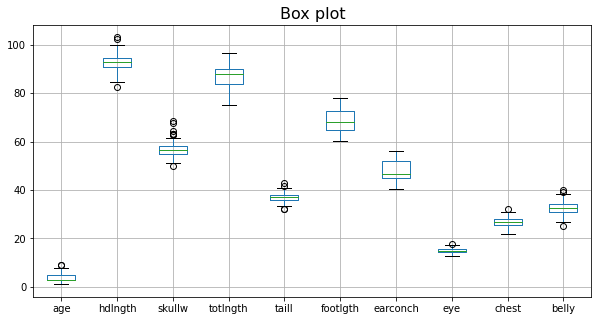

In [7]:
data.loc[:,"age":'belly'].boxplot(figsize=(10,5))
plt.title("Box plot", fontsize=16)
plt.show()

The variables are distributed differently. The **head width**, **skull width**, **tail length** and **belly** have ouliers with **head width** being the one with most of them.

### Total length of possum relatively to population classes

In [8]:
sns.histplot(data = data, x = "totlngth", hue = "Pop", kde = True)

<AxesSubplot:xlabel='totlngth', ylabel='Count'>

The **total length** of the possum is negatively skewed $\implies$ Most of the population **total length** is less than the sample mean.

### Head length and skull width distribution

(array([ 2.,  6.,  3., 18., 28., 16., 13.,  8.,  3.,  4.,  1.,  0.,  0.,
         2.]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
 <BarContainer object of 14 artists>)

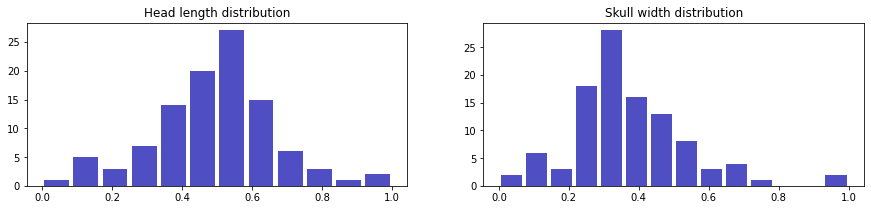

In [9]:
fig0, ax = plt.subplots(1, 2,figsize=(15,3))
# Appliances and lights usage(Wh) of building
ax[0].set_title('Head length distribution')
ax[0].hist(x=hdlngth, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

ax[1].set_title('Skull width distribution')
ax[1].hist(x=skullw, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

- The **head length** of the possum has a normal curve. $\implies$ Symetrically distributed.<br><br>
- The **skull width**, it is positively skewed $\implies$ Most of the population **skull width** is greater than the sample mean.

### Values sorted by age of possum

In [10]:
fig1, axs = plt.subplots(3, 2,figsize=(20,10), dpi= 100, sharex=True, sharey=True)
temp = eda.sort_values("age")
# 
axs[0, 0].set_title('Age of Possum')
axs[0, 1].set_title('Total length of Possum')
axs[0, 0].plot(temp["age"].values)
axs[0, 1].plot(temp["totlngth"].values)

# 
axs[1, 0].set_title('Tail length')
axs[1, 1].set_title('Foot length')
axs[1, 0].plot(temp["taill"].values)
axs[1, 1].plot(temp["footlgth"].values)

# 
axs[2, 0].set_title('Ear conch')
axs[2, 1].set_title('Eye')
axs[2, 0].plot(temp["earconch"].values)
axs[2, 1].plot(temp["eye"].values)

- The data plotted above are sorted by **age of possums**. From this plots, it is very hard to conclude relationship between age and body dimensions.

### Values sorted by total length

In [11]:
fig1, axs = plt.subplots(3, 2,figsize=(20,10), dpi= 100, sharex=False, sharey=False)
temp = eda.sort_values("totlngth")
# 
axs[0, 0].set_title('Total length of Possum')
axs[0, 1].set_title('Age of Possum')
axs[0, 0].plot(temp["totlngth"].values)
axs[0, 1].plot(temp["age"].values)

# 
axs[1, 0].set_title('Tail length')
axs[1, 1].set_title('Foot length')
axs[1, 0].plot(temp["taill"].values)
axs[1, 1].plot(temp["footlgth"].values)

# 
axs[2, 0].set_title('Ear conch')
axs[2, 1].set_title('Eye')
axs[2, 0].plot(temp["earconch"].values)
axs[2, 1].plot(temp["eye"].values)

- The data plotted above are sorted by **total length of possums**. It is slightly observable that the **body dimensions** plots have a positive tendacy, since the plots increase slightly with high variation.

### Population classes & Mean Measurements

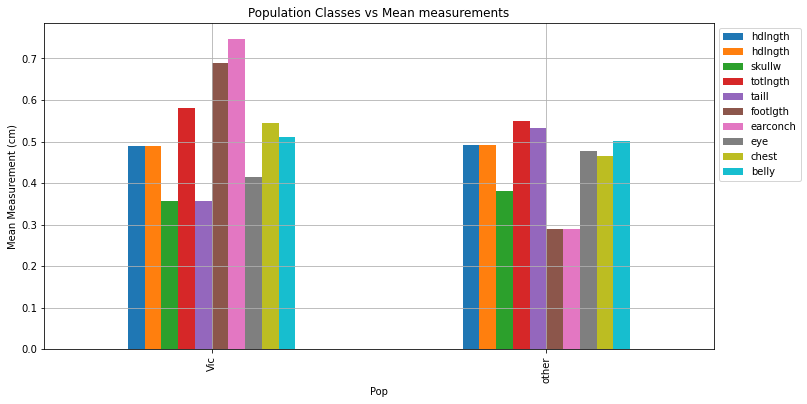

In [12]:
eda.loc[:,("Pop","hdlngth", "hdlngth", "skullw", "totlngth", "taill", 
           "footlgth", "earconch", "eye", "chest", "belly")].groupby(by="Pop").mean().plot(kind="bar", figsize=(12,6))
plt.title('Population Classes vs Mean measurements')
plt.ylabel('Mean Measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

- Individuals from "Victoria" location tend to have longer **ear conch**, **foot length** and **chest girth** than "other" locations.
<br><br>
- Differently, possums from the "other" locations have longer, **tail length** and **eye size**.

### Sex classes & Mean Measurements

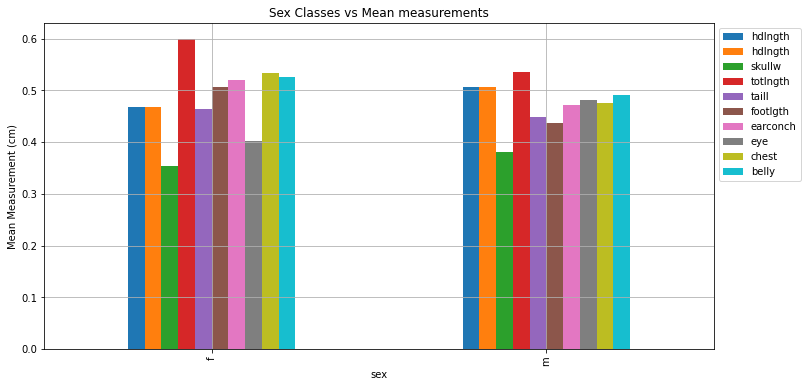

In [13]:
eda.loc[:,("sex","hdlngth", "hdlngth", "skullw", "totlngth", "taill", 
           "footlgth", "earconch", "eye", "chest", "belly")].groupby(by="sex").mean().plot(kind="bar", figsize=(12,6))
plt.title('Sex Classes vs Mean measurements')
plt.ylabel('Mean Measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

- Comparing body dimensions relatively to sex brings little information. Except for the **total length** attribut which is longer for female possums.

# K Nearest Neighbors Algorithm

In [14]:
X = data.loc[:,"age":"belly"]
y = data["Pop"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = np.random, train_size=0.7)

Splitting data into training and testing subsets allows to train the data and perform prediction algorithms.

## Default KNN

In [15]:
# Create the KNN model
k = 5
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model using training split
## X1 (training data) ; y1 (training target)
y_pred = model.fit(X_train , y_train).predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Precision Score: {}".format(precision_score(y_test, y_pred, pos_label='Vic')))
print("Recall Score: {}".format(recall_score(y_test, y_pred, pos_label='Vic')))

Accuracy Score: 0.96875
Precision Score: 1.0
Recall Score: 0.9230769230769231


The KNN is very performant for this dataset. Since the possums of each location have distinctive body dimensions.

In [16]:
perf = pd.DataFrame({'Method': [], 'Parameters': [], 'GridSearch Best Score': [],
                      'Accuracy Score': [], 'Precision Score': [],
                      'Recall Score': []})

# Updating the perforamance table.
methd = ('KNN', 'n_neighbors={}'.format(k),'None',
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, pos_label='Vic'),
        recall_score(y_test, y_pred, pos_label='Vic'))
perf.loc[-1] = methd
perf.index = perf.index + 1

## KNN: Grid Search

In [17]:
#creat a new KNN model
Knn2 = KNeighborsClassifier()
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn2, grid_param, cv = 10)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

y_pred =KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'],
                             weights = grid.best_params_['weights'],
                             metric = grid.best_params_['metric']).fit(X_train , y_train).predict(X_test)

print("\nAccuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Precision Score: {}".format(precision_score(y_test, y_pred, pos_label='Vic')))
print("Recall Score: {}".format(recall_score(y_test, y_pred, pos_label='Vic')))

1.0
KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Accuracy Score: 0.96875
Precision Score: 1.0
Recall Score: 0.9230769230769231


In [18]:
# Updating the perforamance table.
methd = ('KNN: Grid Search', list(grid.best_params_.items()), grid.best_score_,
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, pos_label='Vic'),
        recall_score(y_test, y_pred, pos_label='Vic'))
perf.loc[-1] = methd
perf.index = perf.index + 1

## Grid Search KNN based on Information Gain
### Filter Method - Information Gain

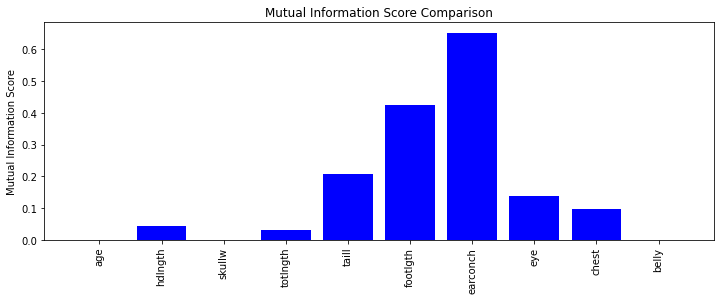

In [19]:
MI_score = mutual_info_classif(X, y, random_state = None)

feature_names = X.columns

plt.figure(figsize=(12,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

According to the *Mutual Information Classifier*, the most distinctive body dimension relatively to the locations of the possums is the **ear conch length**, followed by **foot length**. The rest of the variables have less mutual information with the population classes.

In [20]:
mi_df = pd.DataFrame({'Features': [], 'MIS': []})
for feature in zip(X.columns, MI_score):
    mi_df.loc[-1] = feature
    mi_df.index = mi_df.index + 1  # shifting index
    mi_df = mi_df.sort_index()

mi_df = mi_df.T.sort_values(by='MIS', axis=1, ascending=False)
mi_df

3         4         5         2         1         8  \
Features  earconch  footlgth     taill       eye     chest   hdlngth   
MIS       0.651917   0.42443  0.207118  0.138448  0.098289  0.045104   

                 6      0       7    9  
Features  totlngth  belly  skullw  age  
MIS       0.032251    0.0     0.0  0.0

The table above displays the features decsendingly sorted by the *Mutual Information Classifer Score*.

### Grid Search KNN for 20%, 30%, 40% and 50% of best rated features of Information Gain Classifier

In [21]:
Knn3 = KNeighborsClassifier()
grid_param={'n_neighbors': range(1,31),
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn3, grid_param, cv = 10)

for i in (.2, .3, .4, .5):
    chosen_features = mi_df.iloc[0,:floor(m*i)].values
    grid.fit(X_train[chosen_features],y_train)
    y_pred = grid.predict(X_test[chosen_features])
    
    # Updating the perforamance table.
    methd = ('Grid Search KNN: Info Gain at {}'.format(i), list(grid.best_params_.items()),
             grid.best_score_,accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, pos_label='Vic'),
        recall_score(y_test, y_pred, pos_label='Vic'))
    perf.loc[-1] = methd
    perf.index = perf.index + 1

The code above fits the training set with different more features after each iteration. 20% of the best rated features by *the mutual information classifier score* are chosen first. Eventually, the last iteration fits 50% of the best rated features.

# Decision Tree Classifier
### Default Desicion Tree Classification

In [22]:
DTC = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
clf = DTC.fit(X_train , y_train)

plt.figure(figsize=(7,7))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=data['Pop'].unique(),
               filled=True, rounded=True)

[Text(234.36, 317.09999999999997, 'earconch <= 48.7\ngini = 0.497\nsamples = 72\nvalue = [33, 39]\nclass = other'),
 Text(156.24, 190.26, 'earconch <= 41.0\ngini = 0.049\nsamples = 40\nvalue = [1, 39]\nclass = other'),
 Text(78.12, 63.420000000000016, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Vic'),
 Text(234.36, 63.420000000000016, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]\nclass = other'),
 Text(312.48, 190.26, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = Vic')]

In [23]:
# Updating the perforamance table.
y_pred = DTC.predict(X_test)
methd = ('DecisionTree Classifier', 'min_impurity_decrease=0.01',
         "None", accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, pos_label='Vic'),
         recall_score(y_test, y_pred, pos_label='Vic'))
perf.loc[-1] = methd
perf.index = perf.index + 1

## Decision Tree Classification: Grid Search

In [24]:
# Create a new DesicionTree Classifier model
DTC2 = tree.DecisionTreeClassifier()

grid_param={'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': range(2, len(X.columns)+1),
            'max_leaf_nodes': range(len(Pop.unique()),3*len(Pop.unique())+1),
            'min_impurity_decrease': np.arange(0.01, 0.05,0.01)}

grid = GridSearchCV(DTC2, grid_param, cv = 10)
grid.fit(X_train , y_train)
print("\nGrid best score: {}".format(grid.best_score_))
print("\nGrid best parameters:\n{}".format(grid.best_params_))
print("\nGrid best estimator: {}".format(grid.best_estimator_))


Grid best score: 1.0

Grid best parameters:
{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.03, 'splitter': 'random'}

Grid best estimator: DecisionTreeClassifier(max_depth=7, max_leaf_nodes=5,
                       min_impurity_decrease=0.03, splitter='random')


In [25]:
y_pred = tree.DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.01).fit(X_train, y_train).predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Precision Score: {}".format(precision_score(y_test, y_pred, pos_label='Vic')))
print("Recall Score: {}".format(recall_score(y_test, y_pred, pos_label='Vic')))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


In [26]:
# Updating the perforamance table.
methd = ('DecisionTree Classifier: Grid Search', list(grid.best_params_.items()), grid.best_score_,
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, pos_label='Vic'),
        recall_score(y_test, y_pred, pos_label='Vic'))
perf.loc[-1] = methd
perf.index = perf.index + 1

In [27]:
DTC2 = tree.DecisionTreeClassifier(criterion = grid.best_params_['criterion'],
                                   splitter = grid.best_params_['splitter'],
                                   max_depth = grid.best_params_['max_depth'],
                                   max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
                                   min_impurity_decrease = grid.best_params_['min_impurity_decrease'])
clf = DTC2.fit(X_train , y_train)

plt.figure(figsize=(10,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=data['Pop'].unique(),
               filled=True, rounded=True)

[Text(279.0, 489.24, 'footlgth <= 74.669\ngini = 0.497\nsamples = 72\nvalue = [33, 39]\nclass = other'),
 Text(186.0, 380.52000000000004, 'footlgth <= 68.502\ngini = 0.487\nsamples = 67\nvalue = [28, 39]\nclass = other'),
 Text(93.0, 271.8, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]\nclass = other'),
 Text(279.0, 271.8, 'skullw <= 58.616\ngini = 0.225\nsamples = 31\nvalue = [27, 4]\nclass = Vic'),
 Text(186.0, 163.08000000000004, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = Vic'),
 Text(372.0, 163.08000000000004, 'taill <= 36.149\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = other'),
 Text(279.0, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Vic'),
 Text(465.0, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = other'),
 Text(372.0, 380.52000000000004, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Vic')]

# Performance Table of Classifiers

In [30]:
Performance_table = tabulate(perf[["Method","Accuracy Score", "Precision Score","Recall Score"]].values, perf[["Method","Accuracy Score", "Precision Score","Recall Score"]].columns, tablefmt='grid')
print(Performance_table)

+--------------------------------------+------------------+-------------------+----------------+
| Method                               |   Accuracy Score |   Precision Score |   Recall Score |
+======================================+==================+===================+================+
| KNN                                  |          0.96875 |                 1 |       0.923077 |
+--------------------------------------+------------------+-------------------+----------------+
| KNN: Grid Search                     |          0.96875 |                 1 |       0.923077 |
+--------------------------------------+------------------+-------------------+----------------+
| Grid Search KNN: Info Gain at 0.2    |          0.96875 |                 1 |       0.923077 |
+--------------------------------------+------------------+-------------------+----------------+
| Grid Search KNN: Info Gain at 0.3    |          0.96875 |                 1 |       0.923077 |
+-----------------------------